# Eurostat SHARES

Bioenergy

[Standard international energy product classification (SIEC)](http://dd.eionet.europa.eu/vocabulary/eurostat/siec/) vocabulary

[Energy balance](http://dd.eionet.europa.eu/vocabulary/eurostat/nrg_bal/) vocabulary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Standard international energy product classification (SIEC)
# https://dd.eionet.europa.eu
# Dictionary from siec codes to human readable labels
siec = pd.read_csv('siec.csv')
siec
fuels_dict = {k: v for k, v in zip(siec['Label'], siec['Notation'])}

In [3]:
# We are interested in renewables and bioenergy
selected_fuels = [
    'Total',
    'Renewables and biofuels',
    'Primary solid biofuels',
    'Biogases',
    'Liquid biofuels',
    'Renewable municipal waste',
    ]

selected_fuels = [
    'Primary solid biofuels',
    'Biogases',
    'Liquid biofuels',
    'Renewable municipal waste',
    ]

selected_fuel_codes = [v for k,v in fuels_dict.items() if k in selected_fuels]

selected_countries = ['AT', 'CZ', 'DK', 'NL', 'PL', 'SK']

In [4]:
selected_fuel_codes

['R5110-5150_W6000RI', 'R5200', 'R5300', 'W6210']

## Electricity

In [5]:
# The source file is hybrid with tabs and commas as separators
el = pd.read_table('nrg_ind_ured.tsv', delimiter='[\t,]+')
el.rename(columns={'geo\\time': 'geo'}, inplace=True)
el.rename(columns={str(year) + ' ': year for year in range(2004, 2019)}, inplace=True)
el.rename(columns={'2004': 2004}, inplace=True)

In [6]:
el.head()

,siec,nrg_bal,unit,geo,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004
0,E7000,GEP_NPUMP_MIX,GWH,AL,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000
1,E7000,GEP_NPUMP_MIX,GWH,AT,3574.539,2958.855,3877.193,3748.451,4375.092,4403.564,4626.926,3100.056,3832.03,4419.345,3832.019,3925.298,3263.976,3965.61,3754.119
2,E7000,GEP_NPUMP_MIX,GWH,BA,336.000,81.000,111.000,242.000,173.000,713.000,239.000,149.000,794.00,386.000,115.000,102.000,316.000,0.00,0.000
3,E7000,GEP_NPUMP_MIX,GWH,BE,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000
4,E7000,GEP_NPUMP_MIX,GWH,BG,717.301,244.947,444.000,391.000,335.000,296.000,261.000,364.000,670.00,465.000,379.000,374.000,600.000,566.00,464.000


In [7]:
# https://stackoverflow.com/questions/26577516/how-to-test-if-a-string-contains-one-of-the-substrings-in-a-list-in-pandas

needed_countries = el['geo'].str.contains('|'.join(selected_countries))
needed_fuels = el['siec'].str.contains('|'.join(selected_fuel_codes))
gep = el['nrg_bal'].str.contains('GEP_')
gfc = el['nrg_bal'].str.contains('GFC_')

In [8]:
el[needed_countries & needed_fuels].sort_values('geo')

,siec,nrg_bal,unit,geo,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004
121,R5110-5150_W6000RI,GEP_RED,GWH,AT,3965.583,3934.744,3783.520,3711.788,3603.280,3817.831,3797.430,3711.060,3590.280,3413.972,3316.313,3163.529,2544.535,1927.129,1699.639
401,R5300B,GEP_RED,GWH,AT,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
761,W6210,GEP_RED,GWH,AT,335.804,315.521,330.364,302.241,331.019,255.089,239.598,211.580,213.963,214.075,203.972,222.010,210.903,140.273,131.891
361,R5300,GEP_RED,GWH,AT,628.313,670.346,665.712,633.524,613.294,622.787,641.672,625.115,646.155,608.603,601.945,601.994,411.691,310.980,58.909
406,R5300B,GEP_RED,GWH,CZ,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
366,R5300,GEP_RED,GWH,CZ,2607.205,2639.263,2589.023,2610.964,2583.363,2293.592,1467.684,928.714,634.662,441.265,266.868,215.222,175.837,160.857,138.794
766,W6210,GEP_RED,GWH,CZ,100.189,114.318,98.563,86.651,87.945,83.842,86.685,90.190,35.586,10.937,11.684,11.975,11.264,10.612,10.031
126,R5110-5150_W6000RI,GEP_RED,GWH,CZ,2120.884,2213.397,2067.744,2091.495,1992.218,1683.272,1817.337,1684.571,1492.239,1396.262,1170.527,968.062,731.066,560.252,564.546
368,R5300,GEP_RED,GWH,DK,619.795,581.901,498.403,460.578,450.834,381.998,377.558,345.949,356.326,363.000,291.000,304.000,284.000,281.000,281.000
128,R5110-5150_W6000RI,GEP_RED,GWH,DK,4417.779,4796.961,3483.213,2796.176,2958.613,3056.461,3176.307,3077.696,3323.861,1987.000,1803.000,1828.000,1778.000,1894.000,1834.000


In [9]:
bioel = el[needed_countries & needed_fuels & gep].groupby(['geo']).sum() * 3.6 / 41.868
bioel = bioel.transpose()
bioel

geo,AT,CZ,DK,NL,PL,SK
2018,423.877902,415.157180,517.597936,403.749785,562.843250,139.724850
2017,423.096389,427.083233,545.811780,406.709544,557.665950,145.829751
2016,410.971281,408.884781,421.198194,430.661651,683.839209,148.839209
2015,399.617627,411.789338,360.332416,431.989338,854.087790,142.906277
2014,391.022614,400.991058,369.771453,436.978762,857.822528,121.840069
2013,403.758126,349.157868,370.800688,516.041015,741.318659,78.331900
2012,402.295787,289.914531,382.283061,621.237747,867.932072,80.911436
2011,391.036543,232.457008,376.170335,606.696217,653.440327,70.421324
2010,382.665348,185.940413,394.934394,602.227859,542.011178,56.921754
2009,364.286328,158.939295,285.382631,520.672915,449.127515,46.173689


In [10]:
# TJ
bioel_tj = bioel * 41.868

<AxesSubplot:title={'center':'Bioelectricity'}, xlabel='year', ylabel='GEP_RED (ktoe)'>

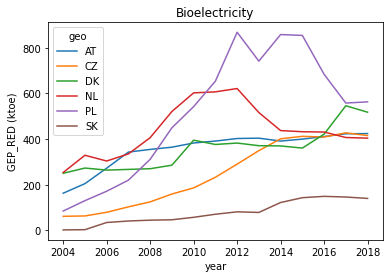

In [11]:
bioel.to_csv('bioelectricity_ktoe.csv')
bioel_tj.to_csv('bioelectricity_tj.csv')

bioel.plot(title='Bioelectricity', ylabel='GEP_RED (ktoe)', xlabel='year')

## Heating and cooling sector

In [12]:
hc = pd.read_table('nrg_ind_urhcd.tsv', delimiter='[\t,]+')
hc.rename(columns={'geo\\time': 'geo'}, inplace=True)
hc.rename(columns={str(year) + ' ': year for year in range(2004, 2019)}, inplace=True)
hc.rename(columns={'2004': 2004}, inplace=True)

for col in range(2004,2019):
    hc[col] = pd.to_numeric(hc[col], errors='coerce')

needed_countries = hc['geo'].str.contains('|'.join(selected_countries))
needed_fuels = hc['siec'].str.contains('|'.join(selected_fuel_codes))
ghp = hc['nrg_bal'].str.contains('GHP_')
fc = hc['nrg_bal'].str.contains('FC_')
hc[needed_countries & needed_fuels & (fc | ghp)].sort_values('geo')

,siec,nrg_bal,unit,geo,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004
1,R5110-5150_W6000RI,FC_IND_OTH_E,KTOE,AT,3016.202,3238.780,3178.363,3068.988,2986.975,3290.316,3180.328,3078.953,3229.346,2931.640,2906.921,2937.199,2803.397,2654.562,2297.650
641,R5300B,FC_IND_OTH_E,KTOE,AT,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
441,R5300,FC_IND_OTH_E,KTOE,AT,37.439,51.992,48.107,46.397,44.279,35.195,32.214,24.530,21.796,17.630,26.219,17.740,14.575,19.437,8.551
1041,W6210,GHP_RED,KTOE,AT,64.277,65.469,61.776,57.417,50.630,46.562,49.186,53.784,48.582,42.634,33.963,29.739,27.426,27.694,28.470
41,R5110-5150_W6000RI,GHP_RED,KTOE,AT,871.660,902.131,847.381,846.176,805.067,836.869,838.954,763.560,722.770,580.464,530.559,407.703,335.334,263.837,250.669
681,R5300B,GHP_RED,KTOE,AT,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1001,W6210,FC_IND_OTH_E,KTOE,AT,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
481,R5300,GHP_RED,KTOE,AT,7.060,3.813,5.850,3.471,4.642,6.340,7.133,6.856,7.344,6.868,9.517,8.495,7.921,5.341,1.863
46,R5110-5150_W6000RI,GHP_RED,KTOE,CZ,161.939,171.034,160.672,153.196,139.032,119.495,70.316,71.367,58.708,49.847,45.428,40.078,37.762,52.403,145.242
686,R5300B,GHP_RED,KTOE,CZ,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [13]:
biohc = hc[needed_countries & needed_fuels & (fc | ghp)].groupby('geo').sum()
biohc = biohc.transpose()
biohc

geo,AT,CZ,DK,NL,PL,SK
2018,3996.638,2718.712,3278.932,1199.548,5446.708,627.447
2017,4262.185,2684.060,3195.797,1218.637,5446.293,584.432
2016,4141.477,2674.884,2886.182,1111.444,5325.044,560.214
2015,4022.449,2619.925,2722.196,1117.276,5024.339,614.694
2014,3891.593,2544.880,2422.821,1035.055,4885.809,492.358
2013,4215.282,2474.587,2409.527,972.167,5219.068,473.153
2012,4107.815,2285.946,2345.785,918.940,5016.791,519.370
2011,3927.683,2162.057,2316.364,892.908,4880.243,552.307
2010,4029.838,2098.164,2407.420,853.936,4608.270,536.854
2009,3579.236,2002.699,2120.283,823.906,4159.167,513.639


In [14]:
biohc_tj = biohc * 41.868

<AxesSubplot:title={'center':'Bioheat'}, xlabel='year', ylabel='FC_IND_OTH_E + GHP_RED (ktoe)'>

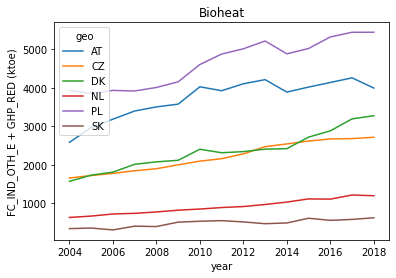

In [15]:
biohc.to_csv('bioheat_ktoe.csv')
biohc_tj.to_csv('bioheat_tj.csv')

biohc.plot(title='Bioheat', ylabel='FC_IND_OTH_E + GHP_RED (ktoe)', xlabel='year')

## Transport

In [16]:
tr = pd.read_table('nrg_ind_urtd.tsv', delimiter='[\t,]+')
tr.rename(columns={'geo\\time': 'geo'}, inplace=True)
tr.rename(columns={str(year) + ' ': year for year in range(2004, 2019)}, inplace=True)
tr.rename(columns={'2004': 2004}, inplace=True)

for col in range(2004,2019):
    tr[col] = pd.to_numeric(tr[col], errors='coerce')

needed_countries = tr['geo'].str.contains('|'.join(selected_countries))
needed_fuels = tr['siec'].str.contains('|'.join(selected_fuel_codes))
fc = tr['nrg_bal'].str.contains('FC_TRA_')

tr[needed_countries & needed_fuels & fc].sort_values('geo')

,siec,nrg_bal,unit,geo,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004
361,R5200,FC_TRA_OTH_E_RED,KTOE,AT,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1761,R5300,FC_TRA_RAIL_E_RED,KTOE,AT,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1721,R5300,FC_TRA_OTH_E_RED,KTOE,AT,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
441,R5200,FC_TRA_ROAD_E_RED,KTOE,AT,469.607,476.126,540.636,650.676,593.875,499.918,488.088,495.108,492.312,507.949,392.807,319.731,253.938,73.258,0.000
401,R5200,FC_TRA_RAIL_E_RED,KTOE,AT,1.860,2.051,2.464,2.451,2.570,2.357,2.864,2.666,3.109,3.165,2.402,2.364,2.125,0.509,0.000
1801,R5300,FC_TRA_ROAD_E_RED,KTOE,AT,0.378,0.275,0.411,0.416,0.550,0.018,0.011,0.007,0.002,0.001,0.000,0.000,0.000,0.000,0.000
1806,R5300,FC_TRA_ROAD_E_RED,KTOE,CZ,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
406,R5200,FC_TRA_RAIL_E_RED,KTOE,CZ,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1726,R5300,FC_TRA_OTH_E_RED,KTOE,CZ,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1766,R5300,FC_TRA_RAIL_E_RED,KTOE,CZ,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [17]:
biotr = tr[needed_countries & needed_fuels & fc].groupby('geo').sum()
biotr = biotr.transpose()
biotr

geo,AT,CZ,DK,NL,PL,SK
2018,471.845,308.708,218.680,509.831,912.404,145.41
2017,478.452,313.844,218.487,311.528,604.887,146.22
2016,543.511,301.113,235.658,243.820,457.417,141.06
2015,653.543,296.503,232.003,302.767,653.428,149.37
2014,596.995,316.757,231.083,355.747,705.370,136.11
2013,502.293,277.109,226.605,306.594,747.531,102.11
2012,490.963,275.270,226.605,321.721,807.349,94.15
2011,497.781,300.110,130.489,329.246,915.535,100.27
2010,495.423,231.251,26.784,228.748,867.425,96.59
2009,511.115,194.779,8.684,372.732,635.888,84.45


In [18]:
biotr_tj = biotr * 41.868
biotr_tj

geo,AT,CZ,DK,NL,PL,SK
2018,19755.206460,12924.986544,9155.694240,21345.604308,38200.530672,6088.02588
2017,20031.828336,13140.020592,9147.613716,13043.054304,25325.408916,6121.93896
2016,22755.718548,12606.999084,9866.529144,10208.255760,19151.134956,5905.90008
2015,27362.538324,12413.987604,9713.501604,12676.248756,27357.723504,6253.82316
2014,24994.986660,13261.982076,9674.983044,14894.415396,29532.431160,5698.65348
2013,21030.003324,11601.999612,9487.498140,12836.477592,31297.627908,4275.14148
2012,20555.638884,11525.004360,9487.498140,13469.814828,33802.087932,3941.87220
2011,20841.094908,12565.005480,5463.313452,13784.871528,38331.619380,4198.10436
2010,20742.370164,9682.016868,1121.392512,9577.221264,36317.349900,4044.03012
2009,21399.362820,8155.007172,363.581712,15605.543376,26623.358784,3535.75260


<AxesSubplot:title={'center':'Biotransport'}, xlabel='year', ylabel=' FC_TRA_ROAD_E_RED (ktoe)'>

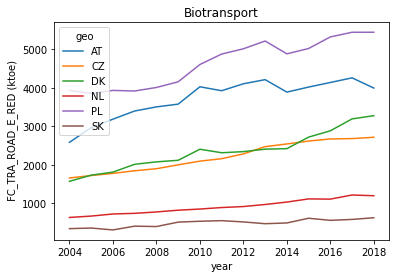

In [19]:
biotr.to_csv('biotrans_ktoe.csv')
biotr_tj.to_csv('biotrans_tj.csv')

biohc.plot(title='Biotransport', ylabel=' FC_TRA_ROAD_E_RED (ktoe)', xlabel='year')

## Bioenergy (all sectors)

<AxesSubplot:title={'center':'Bioenergy'}, xlabel='year', ylabel=' Bioenergy from SHARES (ktoe)'>

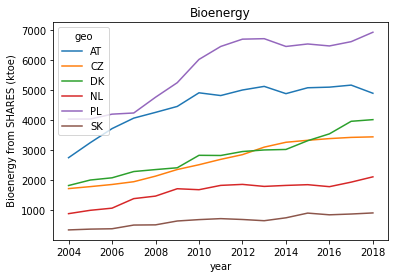

In [20]:
bioenergy = bioel + biohc + biotr
bioenergy_tj = bioenergy * 41.868

bioenergy.to_csv('bioenergy_ktoe.csv')
bioenergy_tj.to_csv('bioenergy_tj.csv')

bioenergy.plot(title='Bioenergy', ylabel=' Bioenergy from SHARES (ktoe)', xlabel='year')